In [14]:
import xarray as xr
import rioxarray as rxr
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [3]:
# open a dataset
ds = xr.open_dataset('/storage/spestana/output_ASTER-MODIS-GOES/ASTER-MODIS-GOES_2020-01-23T060707UTC_orthorectified.nc')

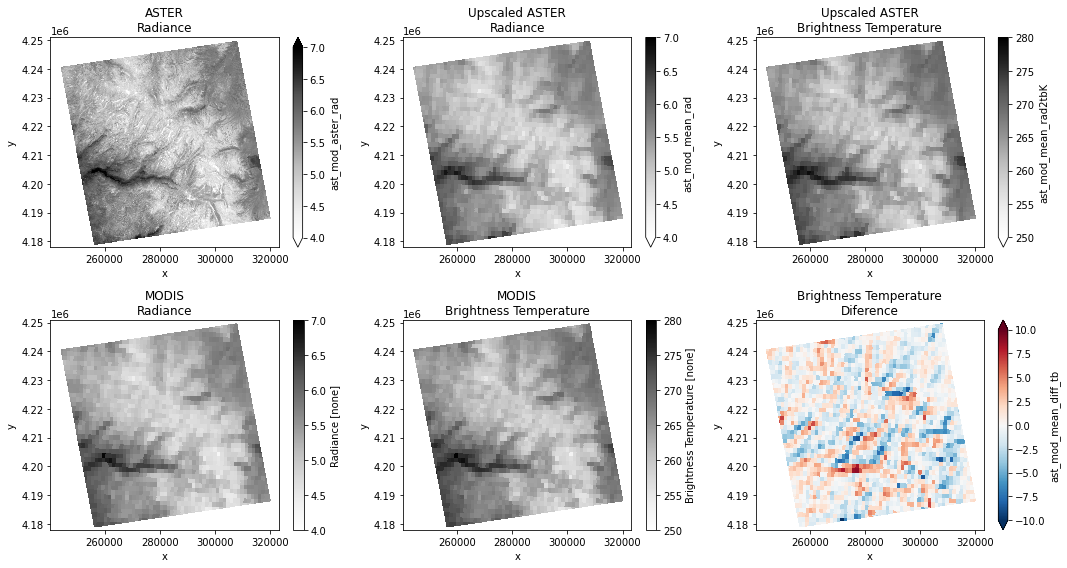

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,8), tight_layout=True)

[ax0, ax1, ax2, ax3, ax4, ax5] = axes.ravel()

(rad_min, rad_max) = (4, 7)
(tb_min, tb_max) = (250, 280)

ds.ast_mod_aster_rad.plot(ax=ax0, vmin=rad_min, vmax=rad_max, cmap='Greys')
ax0.set_title('ASTER\nRadiance')

ds.ast_mod_mean_rad.plot(ax=ax1, vmin=rad_min, vmax=rad_max, cmap='Greys')
ax1.set_title('Upscaled ASTER\nRadiance')

ds.ast_mod_mean_rad2tbK.plot(ax=ax2, vmin=tb_min, vmax=tb_max, cmap='Greys')
ax2.set_title('Upscaled ASTER\nBrightness Temperature')

ds.ast_mod_modis_rad.plot(ax=ax3, vmin=rad_min, vmax=rad_max, cmap='Greys')
ax3.set_title('MODIS\nRadiance')

ds.ast_mod_modis_tb.plot(ax=ax4, vmin=tb_min, vmax=tb_max, cmap='Greys')
ax4.set_title('MODIS\nBrightness Temperature')

ds.ast_mod_mean_diff_tb.plot(ax=ax5, vmin=-10, vmax=10, cmap='RdBu_r')
ax5.set_title('Brightness Temperature\nDiference');




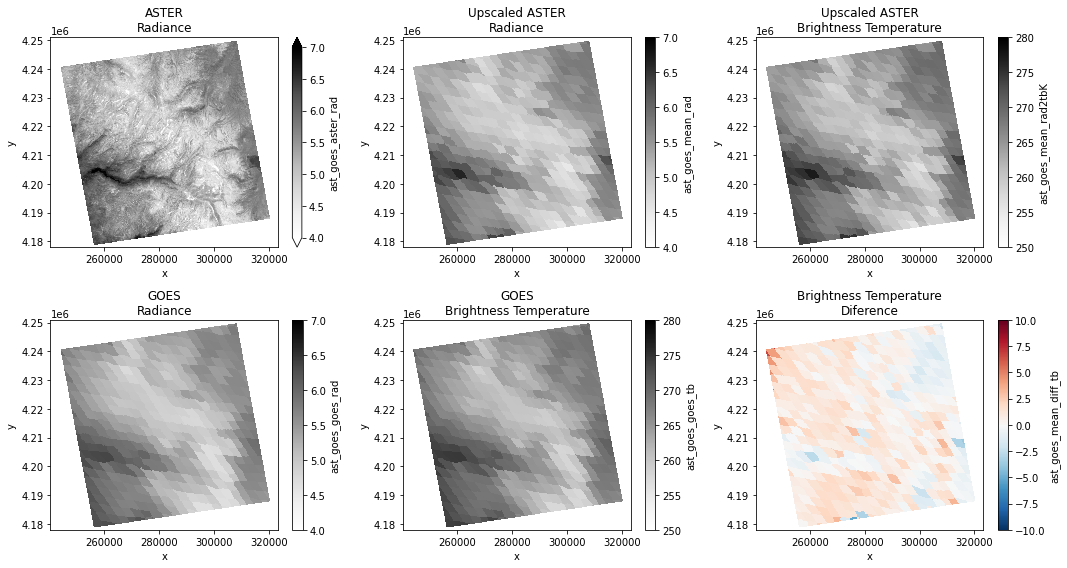

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,8), tight_layout=True)

[ax0, ax1, ax2, ax3, ax4, ax5] = axes.ravel()

(rad_min, rad_max) = (4, 7)
(tb_min, tb_max) = (250, 280)

ds.ast_goes_aster_rad.plot(ax=ax0, vmin=rad_min, vmax=rad_max, cmap='Greys')
ax0.set_title('ASTER\nRadiance')

ds.ast_goes_mean_rad.plot(ax=ax1, vmin=rad_min, vmax=rad_max, cmap='Greys')
ax1.set_title('Upscaled ASTER\nRadiance')

ds.ast_goes_mean_rad2tbK.plot(ax=ax2, vmin=tb_min, vmax=tb_max, cmap='Greys')
ax2.set_title('Upscaled ASTER\nBrightness Temperature')

ds.ast_goes_goes_rad.plot(ax=ax3, vmin=rad_min, vmax=rad_max, cmap='Greys')
ax3.set_title('GOES\nRadiance')

ds.ast_goes_goes_tb.plot(ax=ax4, vmin=tb_min, vmax=tb_max, cmap='Greys')
ax4.set_title('GOES\nBrightness Temperature')

ds.ast_goes_mean_diff_tb.plot(ax=ax5, vmin=-10, vmax=10, cmap='RdBu_r')
ax5.set_title('Brightness Temperature\nDiference');




---

In [31]:
# Larger area around Tuolumne further south and east to include Mammoth
(utm_e_UL, utm_n_UL) = 282500, 4205000
(utm_e_UR, utm_n_UR) = 305000, 4205000
(utm_e_LR, utm_n_LR) = 327500, 4160000
(utm_e_LL, utm_n_LL) = 305000, 4160000

geometry = [
    {
        'type': 'Polygon',
        'coordinates': [[
            [utm_e_UL, utm_n_UL],
            [utm_e_UR, utm_n_UR],
            [utm_e_LR, utm_n_LR],
            [utm_e_LL, utm_n_LL]
        ]]
    }
]

geometry_area_sqkm = ((utm_e_UR - utm_e_UL) * (utm_n_UR - utm_n_LR))/(1000**2)

In [16]:
filepaths = glob.glob('/storage/spestana/output_ASTER-MODIS-GOES/*_orthorectified.nc')
ds = xr.open_mfdataset(filepaths, concat_dim='time', combine='nested')
ds = ds.rio.clip(geometry)

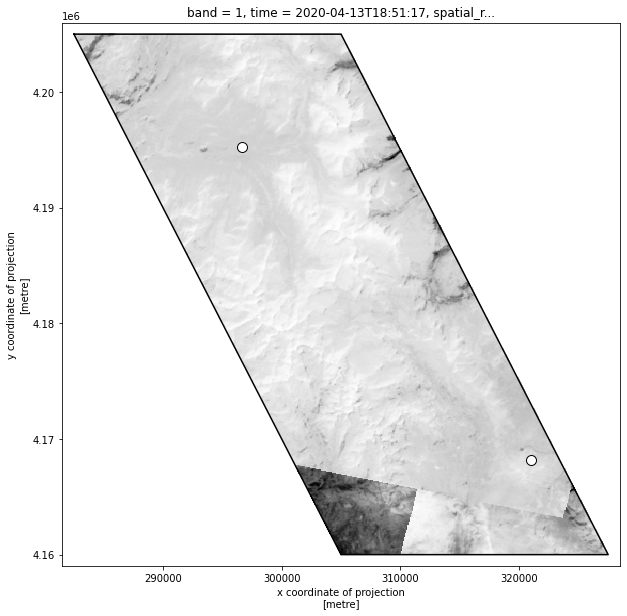

In [27]:
fig, ax = plt.subplots(figsize=(10,10))

for da in ds.ast_goes_aster_rad:
    da.plot(add_colorbar=False, cmap='Greys')
    
ax.set_xlim((utm_e_UL-1000,utm_e_LR+1000))
ax.set_ylim((utm_n_LR-1000,utm_n_UL+1000))

ax.scatter(296649, 4195210, 
                    marker='o', 
                    edgecolor='k', 
                    facecolor='w', 
                    s=100, 
                    label='Gaylor Pit')
ax.scatter(320971, 4168153, 
                    marker='o', 
                    edgecolor='k', 
                    facecolor='w', 
                    s=100, 
                    label='CUES')
ax.plot([utm_e_UL, utm_e_UR, utm_e_LR, utm_e_LL, utm_e_UL],
                 [utm_n_UL, utm_n_UR, utm_n_LR, utm_n_LL, utm_n_UL],
                 linestyle='-', color='k')